<br>

# *Imports* e Funções

In [1]:
import os
import shutil
import zipfile
import requests
import geopandas as gpd

In [2]:
from paths import *

<br>

# Dados Espaciais

## Limites Municipais

In [3]:
# Define qual o código IBGE do Estado
estado = 'SP'

# Define o nome do arquivo que será salvo as informações do IBGE
file = os.path.join(bruto_path, '{}.zip'.format(estado))

# URL para baixar o arquivo zip
url = 'http://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2018/UFs/{}/{}_municipios.zip'.format(estado, str.lower(estado))

# Print
url

'http://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2018/UFs/SP/sp_municipios.zip'

In [4]:
# Define Filename
if url.find('/'):
    filename = url.rsplit('/', 1)[1]
    print(filename)

sp_municipios.zip


In [5]:
# Download
r = requests.get(url, allow_redirects=True)
open(os.path.join(bruto_path, filename), 'wb').write(r.content)

9866438

In [6]:
# Unzip
file = os.path.join(bruto_path, filename)
temp = os.path.join(os.path.dirname(file), 'temp')
os.makedirs(temp, exist_ok=True)

with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall(temp)

In [7]:
# Lista Arquivos
os.listdir(temp)

['35MUE250GC_SIR.cpg',
 '35MUE250GC_SIR.dbf',
 '35MUE250GC_SIR.prj',
 '35MUE250GC_SIR.shp',
 '35MUE250GC_SIR.shx']

,NM_MUNICIP,CD_GEOCMU,geometry
0,GUAIÇARA,3517208,"POLYGON ((-49.82514 -21.58632, -49.82509 -21.5..."
1,AURIFLAMA,3504206,"POLYGON ((-50.61899 -20.66481, -50.61869 -20.6..."
2,IPAUSSU,3520905,"POLYGON ((-49.67444 -23.05396, -49.67364 -23.0..."
3,HORTOLÂNDIA,3519071,"POLYGON ((-47.24001 -22.84656, -47.24036 -22.8..."
4,BARRA DO TURVO,3505401,"POLYGON ((-48.50267 -24.74675, -48.50245 -24.7..."


<AxesSubplot:>

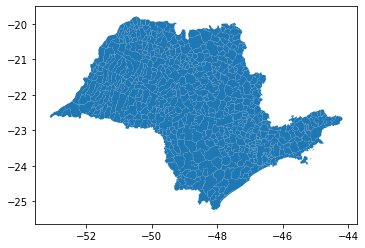

In [8]:
# Read shapefile
gdf = gpd.read_file(os.path.join(temp, '35MUE250GC_SIR.shp'))
display(gdf.head(5))
gdf.plot()

In [9]:
gdf=gdf[['CD_GEOCMU', 'NM_MUNICIP', 'geometry']]

# Renomeia Colunas
gdf = gdf.rename(
    columns={
        'NM_MUNICIP':'nome_municipio',
        'CD_GEOCMU' :'id_municipio'
    }
)

# Results
print(gdf.dtypes)
display(gdf.head(5))

id_municipio        object
nome_municipio      object
geometry          geometry
dtype: object


,id_municipio,nome_municipio,geometry
0,3517208,GUAIÇARA,"POLYGON ((-49.82514 -21.58632, -49.82509 -21.5..."
1,3504206,AURIFLAMA,"POLYGON ((-50.61899 -20.66481, -50.61869 -20.6..."
2,3520905,IPAUSSU,"POLYGON ((-49.67444 -23.05396, -49.67364 -23.0..."
3,3519071,HORTOLÂNDIA,"POLYGON ((-47.24001 -22.84656, -47.24036 -22.8..."
4,3505401,BARRA DO TURVO,"POLYGON ((-48.50267 -24.74675, -48.50245 -24.7..."


epsg:4674
epsg:4326


<AxesSubplot:>

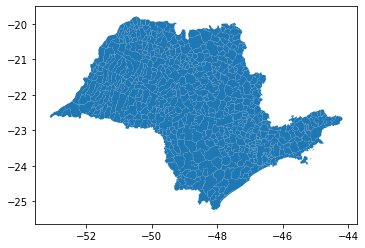

In [10]:
# Reprojeta
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)
print(gdf.crs)
gdf.plot()

In [11]:
# Salva
gdf.to_file(os.path.join(output_path, 'limite_municipal_sp.geojson'), driver='GeoJSON', encoding='utf-8')
gdf.to_file(os.path.join(output_path, 'limite_municipal_sp.gpkg'), layer='Limite', driver='GPKG')

/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
# Excluí pasta temporária
shutil.rmtree(temp)